# MSN 514 - Chapter 05: Langevin

## Brownian motion

In [25]:
import numpy as np
import pygame
from IPython.display import clear_output
import matplotlib.pyplot as plt

dt = 0.1

# Set up the ball properties
r_pollen = 100
radius = 3
num_balls = 100
m_balls = 1
m_pollen = 100

# Set up the box properties
Lxn = -300
Lxp = 300
Lyn = -300
Lyp = 300

n_trace = 1000
trace = np.zeros((n_trace,2))

x = np.random.uniform(Lxn+radius, Lxp-radius, num_balls)
y = np.random.uniform(Lyn+radius, Lyp-radius, num_balls)
positions = np.column_stack((x, y))
p_pollen = np.array([0.0, 0.0])

vx = np.random.randn(num_balls)
vy = np.random.randn(num_balls)
velocities = np.column_stack((vx, vy))
v_pollen = np.array([1, 0.0])

# Set up the screen
width, height = 800, 800
screen = pygame.display.set_mode((width, height))
pygame.display.set_caption("Bouncing Balls")

# Set up the colors
red = (255, 0, 0)
green = (0, 255, 0)
blue = (0, 0, 255)
black = (0, 0, 0)
white = (255, 255, 255)

# Game loop
running = True
clock = pygame.time.Clock()

nt = 0
kicks = []
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        elif event.type == pygame.KEYDOWN:
            if event.key == pygame.K_d:
                dt = dt*2
            elif event.key == pygame.K_a:
                dt = dt/2
            elif event.key == pygame.K_s:
                velocities = -velocities
                v_pollen = -v_pollen
            elif event.key == pygame.K_w:
                dt = 0

    nt += 1
    trace[nt % n_trace] = p_pollen

    # Update ball positions
    positions += velocities*dt
    p_pollen += v_pollen*dt

    # Check for collisions with walls
    for i in range(num_balls):
        if positions[i][0] < Lxn + radius and velocities[i][0] < 0:
            velocities[i][0] = -velocities[i][0]
        if positions[i][0] > Lxp - radius and velocities[i][0] > 0:
            velocities[i][0] = -velocities[i][0]
        if positions[i][1] < Lyn + radius and velocities[i][1] < 0:
            velocities[i][1] = -velocities[i][1]
        if positions[i][1] > Lyp - radius and velocities[i][1] > 0:
            velocities[i][1] = -velocities[i][1]

    # Check collision of pollen with walls
    if p_pollen[0] < Lxn + r_pollen and v_pollen[0] < 0:
        v_pollen[0] = -v_pollen[0]
    if p_pollen[0] > Lxp - r_pollen and v_pollen[0] > 0:
        v_pollen[0] = -v_pollen[0]
    if p_pollen[1] < Lyn + r_pollen and v_pollen[1] < 0:
        v_pollen[1] = -v_pollen[1]
    if p_pollen[1] > Lyp - r_pollen and v_pollen[1] > 0:
        v_pollen[1] = -v_pollen[1]


    # Sort with respect to x
    x_index = np.argsort(positions[:,0])

    # Check for collisions between balls
    for xi in range(num_balls):
        i = x_index[xi]
        for xj in range(xi+1, num_balls):
            j = x_index[xj]
            if (positions[j,0] - positions[i,0] > 2*radius):
                break
            else:
                rp = positions[j] - positions[i]
                nrp = np.linalg.norm(rp)
                if nrp < 2*radius:
                    rv = velocities[j] - velocities[i]
                    if np.dot(rv,rp) < 0:
                        vp = np.dot(rv,rp)*rp/nrp**2
                        velocities[i] += vp
                        velocities[j] -= vp
        
        # Check for collision with pollen
        rp = p_pollen - positions[i]
        nrp = np.linalg.norm(rp)
        if nrp < radius + r_pollen:
            rv = v_pollen - velocities[i]
            if np.dot(rv,rp) < 0:
                vp = 2 * np.dot(rv, rp) * rp / nrp ** 2
                velocities[i] += vp * m_pollen / (m_balls + m_pollen)
                v_pollen -= vp * m_balls / (m_balls + m_pollen)
            
    # Clear the screen
    screen.fill(black)

    # Draw the balls
    for i in range(num_balls):
        pygame.draw.circle(screen, white, \
        (int(positions[i][0]+width/2), int(positions[i][1]+height/2)), radius)
    pygame.draw.circle(screen, red, \
        (int(p_pollen[0]+width/2), int(p_pollen[1]+height/2)), r_pollen, width=4)

    # Draw the trace
    for i in range(1,n_trace):
        pygame.draw.circle(screen, green, \
        (int(trace[i][0]+width/2), int(trace[i][1]+height/2)), 2)

    # Draw the box
    pygame.draw.rect(screen, green, \
    (width/2 + Lxn, height/2 + Lyn, Lxp - Lxn, Lyp - Lyn), 2)

    # Update the display
    pygame.display.flip()
    clock.tick(60)

# Quit the game
pygame.quit()


KeyboardInterrupt: 

: 

## Equipartition theorem

0 293.0925835491085
1000 293.09258354910844
2000 293.0925835491084
3000 293.0925835491084
4000 293.09258354910844
5000 293.0925835491085
6000 293.0925835491086
7000 293.0925835491087
8000 293.0925835491088
9000 293.0925835491087


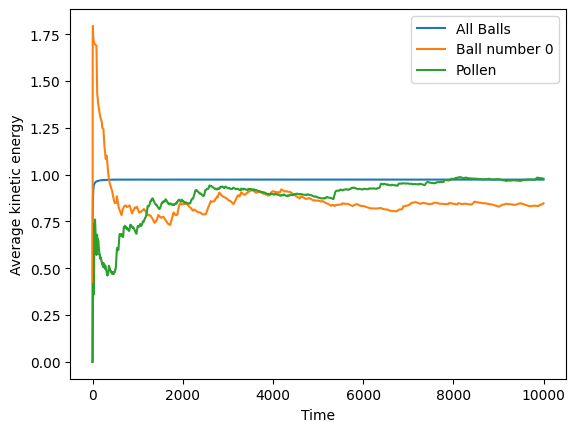

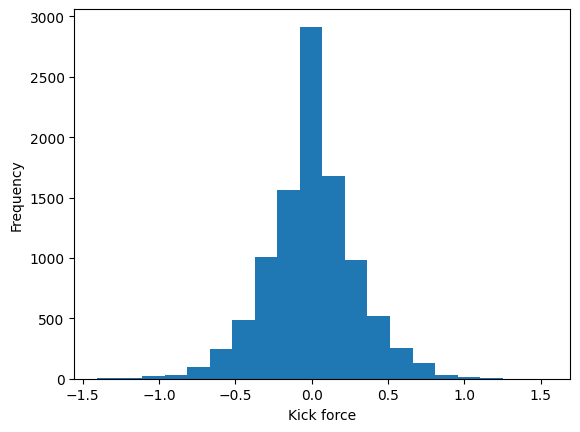

0.28890497848016194


In [ ]:
import numpy as np
from IPython.display import clear_output
import matplotlib.pyplot as plt

dt = 10

# Set up the ball properties
r_pollen = 100
radius = 3
num_balls = 300
m_balls = 1
m_pollen = 100

# Set up the box properties
Lxn = -300
Lxp = 300
Lyn = -300
Lyp = 300

x = np.random.uniform(Lxn+radius, Lxp-radius, num_balls)
y = np.random.uniform(Lyn+radius, Lyp-radius, num_balls)
positions = np.column_stack((x, y))
p_pollen = np.array([0.0, 0.0])

vx = np.random.randn(num_balls)
vy = np.random.randn(num_balls)
velocities = np.column_stack((vx, vy))
v_pollen = np.array([0.0, 0.0])

T = 10000
kick_force = np.zeros((T,2))
Eb_all_t = np.zeros(T)
Eb_0_t = np.zeros(T)
Ep_t = np.zeros(T)
v_t = np.zeros((T,num_balls,2))
for t in range(T):

    E_total = 0.5*(m_balls*np.sum(velocities[:,0]**2 + velocities[:,1]**2) + m_pollen*np.sum(v_pollen**2))
    v_t[t] = velocities

    if t % 1000 == 0:
        print(t, E_total)

    Eb_all_t[t] = 0.5*m_balls*np.mean(velocities[:,0]**2 + velocities[:,1]**2)
    Eb_0_t[t] = 0.5*m_balls*np.sum(velocities[0]**2)
    Ep_t[t] = 0.5*m_pollen*np.sum(v_pollen**2)

    # Update ball positions
    positions += velocities*dt
    p_pollen += v_pollen*dt

    # Check for collisions with walls
    for i in range(num_balls):
        if positions[i][0] < Lxn + radius and velocities[i][0] < 0:
            velocities[i][0] = -velocities[i][0]
        if positions[i][0] > Lxp - radius and velocities[i][0] > 0:
            velocities[i][0] = -velocities[i][0]
        if positions[i][1] < Lyn + radius and velocities[i][1] < 0:
            velocities[i][1] = -velocities[i][1]
        if positions[i][1] > Lyp - radius and velocities[i][1] > 0:
            velocities[i][1] = -velocities[i][1]

    # Check collision of pollen with walls
    if p_pollen[0] < Lxn + r_pollen and v_pollen[0] < 0:
        v_pollen[0] = -v_pollen[0]
    if p_pollen[0] > Lxp - r_pollen and v_pollen[0] > 0:
        v_pollen[0] = -v_pollen[0]
    if p_pollen[1] < Lyn + r_pollen and v_pollen[1] < 0:
        v_pollen[1] = -v_pollen[1]
    if p_pollen[1] > Lyp - r_pollen and v_pollen[1] > 0:
        v_pollen[1] = -v_pollen[1]


    # Sort with respect to x
    x_index = np.argsort(positions[:,0])

    # Check for collisions between balls
    for xi in range(num_balls):
        i = x_index[xi]
        for xj in range(xi+1, num_balls):
            j = x_index[xj]
            if (positions[j,0] - positions[i,0] > 2*radius):
                break
            else:
                rp = positions[j] - positions[i]
                nrp = np.linalg.norm(rp)
                if nrp < 2*radius:
                    rv = velocities[j] - velocities[i]
                    if np.dot(rv,rp) < 0:
                        vp = np.dot(rv,rp)*rp/nrp**2
                        velocities[i] += vp
                        velocities[j] -= vp
        
        # Check for collision with pollen
        rp = p_pollen - positions[i]
        nrp = np.linalg.norm(rp)
        if nrp < radius + r_pollen:
            rv = v_pollen - velocities[i]
            if np.dot(rv,rp) < 0:
                vp = 2 * np.dot(rv, rp) * rp / nrp ** 2
                velocities[i] += vp * m_pollen / (m_balls + m_pollen)
                v_pollen -= vp * m_balls / (m_balls + m_pollen)
                kick_force[t] -= m_pollen * vp * m_balls / (m_balls + m_pollen) / dt

Eba_avg = np.zeros(T)
Eb0_avg = np.zeros(T)
Ep_avg = np.zeros(T) 
for t in range(T):
    Eba_avg[t] = np.sum(Eb_all_t[:t])/(t+1)
    Eb0_avg[t] = np.sum(Eb_0_t[:t])/(t+1)
    Ep_avg[t] = np.sum(Ep_t[:t])/(t+1)
plt.plot(Eba_avg, label='All Balls')
plt.plot(Eb0_avg, label='Ball number 0')
plt.plot(Ep_avg, label='Pollen')
plt.xlabel('Time')
plt.ylabel('Average kinetic energy')
plt.legend()
plt.show()

plt.hist(kick_force[:,0], bins=20)
plt.xlabel('Kick force')
plt.ylabel('Frequency')
plt.show()

print(np.std(kick_force[:,0]))

## Impulse

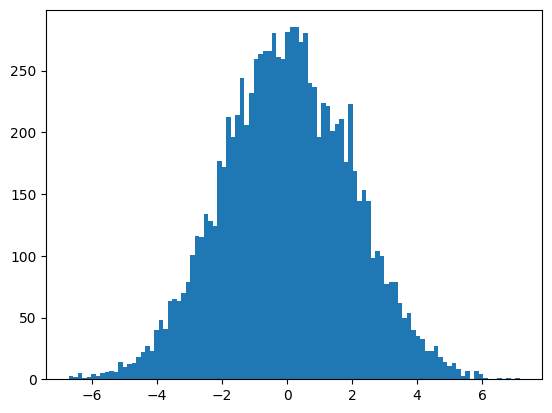

1.9878763935866652


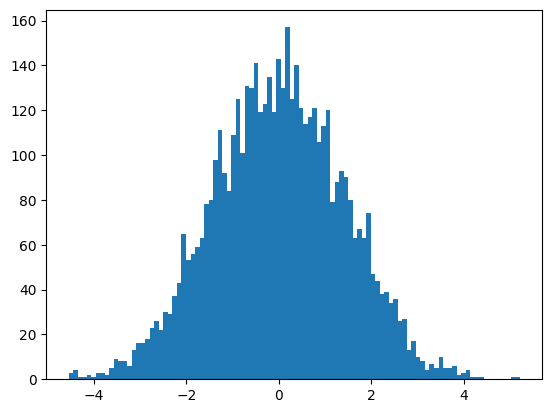

1.4139144821784169


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

m = 2
gamma = 0.1
kbT = 2
dt = 1/2
T = 10000
P0 = 1

dP = P0*np.random.randn(T)

R = dP/dt

plt.hist(R, bins=100)
plt.show()
print(np.std(R))

dP2 = np.sum(dP.reshape(-1,2), axis=1)
dt2 = 2*dt
R2 = dP2/dt2

plt.hist(R2, bins=100)
plt.show()
print(np.std(R2))

In [ ]:
import numpy as np

a = np.array([1,2,3,4,5,6,7,8,9,10])
b = a.reshape(-1,2)
print(b)

[[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]]


## Autocorrelation function

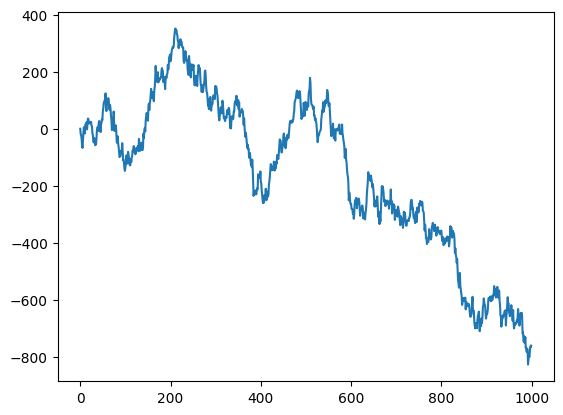

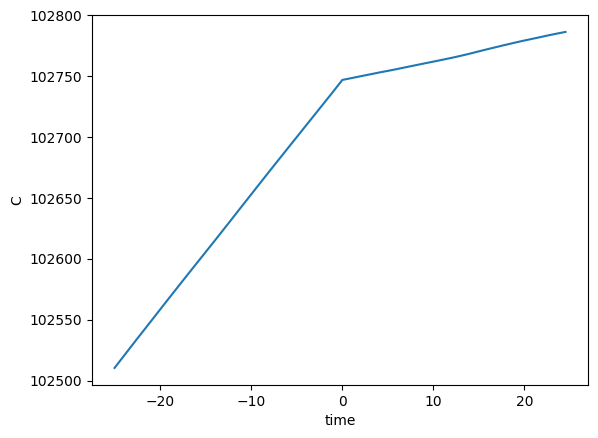

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

m = 2
gamma = 0.1
kbT = 2
dt = 1/2
T = 100000
Q = 100
P0 = 1

dP = P0*np.random.randn(T)

# Uncorrelated
# R = dP/dt

# Correlated
R = np.zeros_like(dP)
for t in range(1,T):
    R[t] = R[t-1]/1 + dP[t]/dt

C = np.zeros(Q)
for t in range(Q//2, T-Q//2):
    C += R[t-Q//2:t+Q//2]*R[t]
C = C/(T-Q)

time = np.arange(-Q//2,Q//2)*dt

plt.plot(R[::100])
plt.show()

plt.plot(time, C)
plt.xlabel('time')
plt.ylabel('C')
plt.show()

## Langevin dynamics

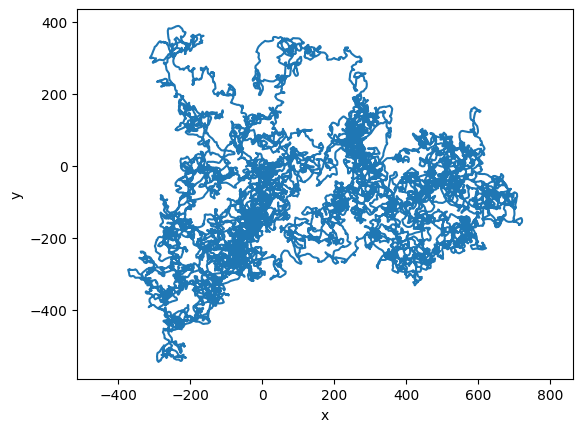

In [ ]:
# Parameters
m = 1       # mass
gamma = 0.1 # friction
kbT = 1     # temperature
dt = 1      # time step
T = 100000  # number of time steps

p = np.zeros((T,2)) # position
v = np.zeros((T,2)) # velocity

th = 2*np.pi*np.random.rand(T) # random angle
mag = np.sqrt(2 * gamma * kbT / dt)*np.random.randn(T) # random magnitude
R = np.column_stack((mag*np.cos(th), mag*np.sin(th))) # random force

for t in range(T-1):
    a = (-gamma * v[t] + R[t]) / m
    p[t+1] = p[t] + v[t]*dt + 0.5*a*dt**2
    v[t+1] = v[t] + a*dt

plt.plot(p[:,0], p[:,1])
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.show()